/home/karahbit/miniconda3/envs/radical.hpo/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


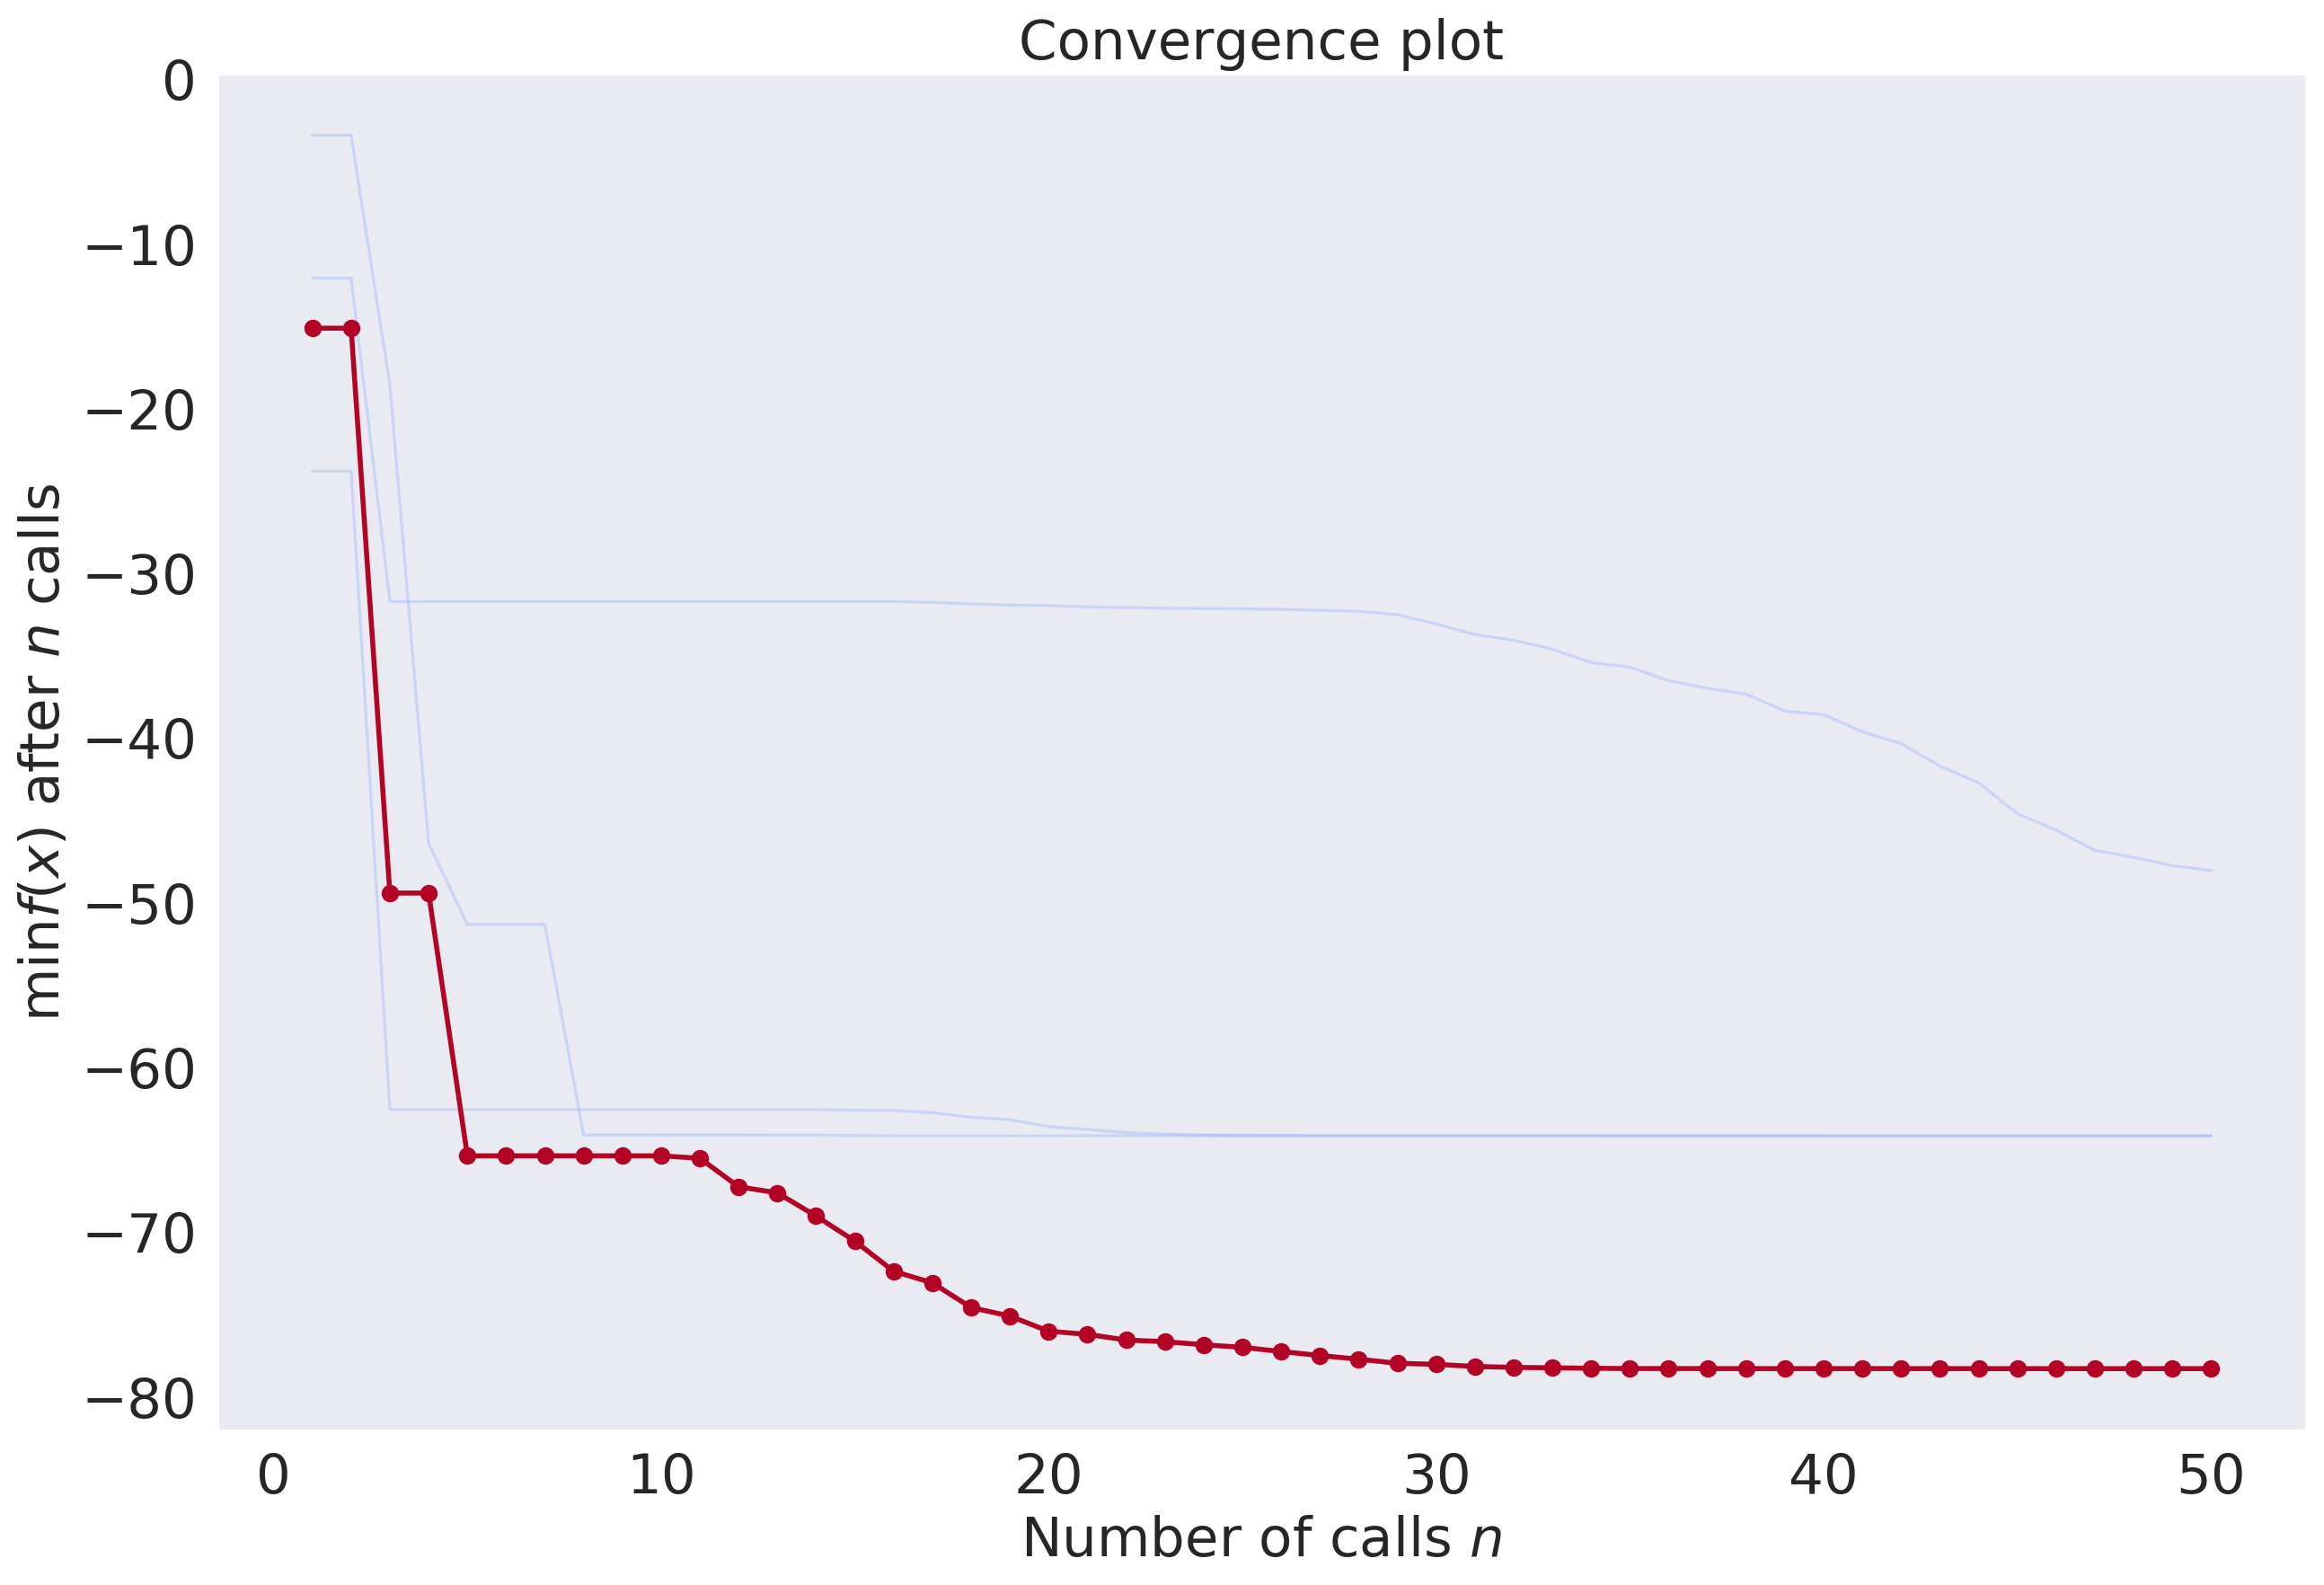

In [1]:
from hyperspace.kepler.data_utils import load_results
from hyperspace.kepler.plots import plot_convergence
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

%matplotlib inline

results = load_results("/home/karahbit/results/benchmarks/styblinskitang", sort=True)
best = results.pop(0)

plt.rcParams['figure.figsize'] = [12, 10]

fig = plot_convergence(results, best)

In [2]:
fig[0].savefig('results_benchmark.png')

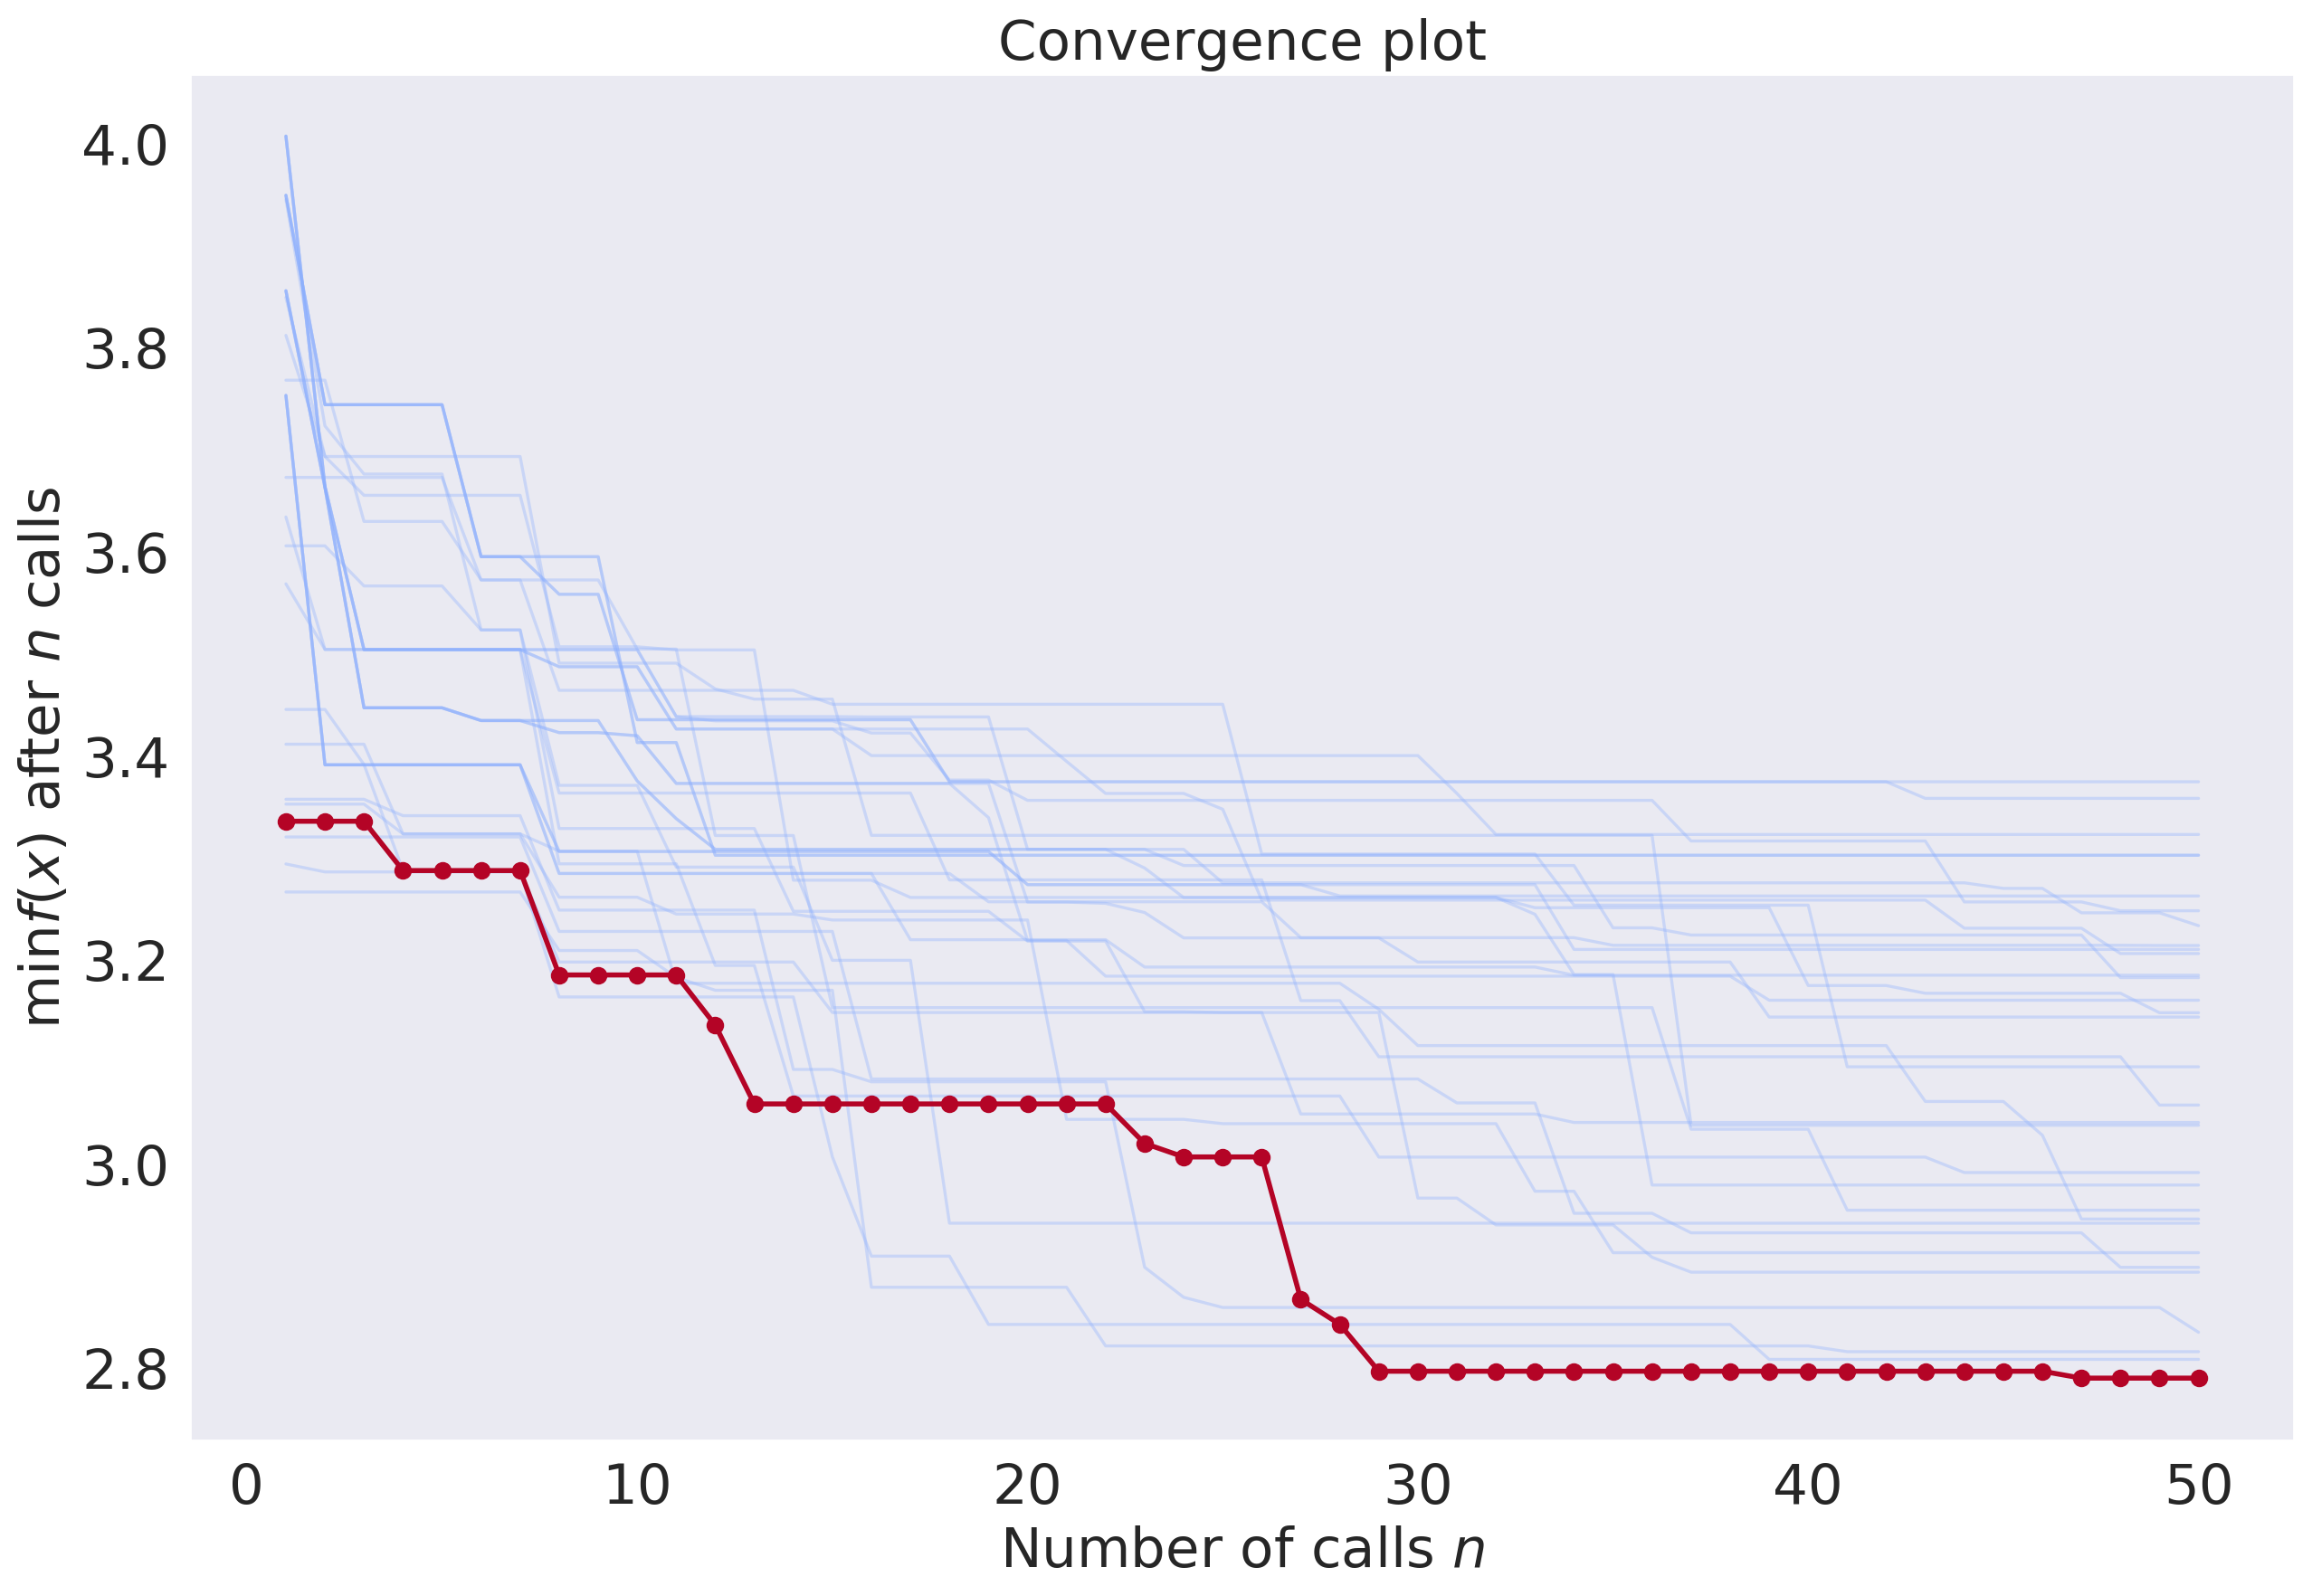

In [3]:
fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

%matplotlib inline

def objective(params):
    """
    Objective function to be minimized.
    Parameters
    ----------
    * params [list, len(params)=n_hyperparameters]
        Settings of each hyperparameter for a given optimization iteration.
        - Controlled by hyperspaces's hyperdrive function.
        - Order preserved from list passed to hyperdrive's hyperparameters argument.
    """
    #max_depth, learning_rate, max_features, min_samples_split, min_samples_leaf = params
    max_depth, learning_rate, max_features, min_samples_split, min_samples_leaf = params

    reg.set_params(max_depth=max_depth,
                   learning_rate=learning_rate,
                   max_features=max_features,
                   min_samples_split=min_samples_split,
                   min_samples_leaf=min_samples_leaf)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

results = load_results("/home/karahbit/results/gbm", sort=True)
best = results.pop(0)

plt.rcParams['figure.figsize'] = [12, 10]

fig = plot_convergence(results, best)